In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling  import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
# load the train dataset
data = pd.read_csv('data/atis_intents_train.csv')
data.columns = ['intent','text']

In [3]:
data.groupby('intent')['text'].count().reset_index()

,intent,text
0,atis_abbreviation,147
1,atis_aircraft,81
2,atis_airfare,423
3,atis_airline,157
4,atis_flight,3665
5,atis_flight_time,54
6,atis_ground_service,255
7,atis_quantity,51


In [4]:
data['intent'].value_counts(normalize=True)*100

atis_flight            75.832816
atis_airfare            8.752328
atis_ground_service     5.276226
atis_airline            3.248500
atis_abbreviation       3.041589
atis_aircraft           1.675978
atis_flight_time        1.117318
atis_quantity           1.055245
Name: intent, dtype: float64

<AxesSubplot:>

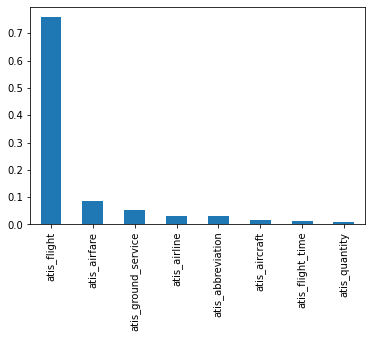

In [5]:
data['intent'].value_counts(normalize=True).plot(kind='bar')

In [6]:
train_x = np.array(data['text'].values).reshape(-1,1)
train_y = np.array(data['intent'].values).reshape(-1,1)

In [7]:
# Counter(train_y)
Counter(data['intent'].values)

Counter({'atis_flight': 3665,
         'atis_flight_time': 54,
         'atis_airfare': 423,
         'atis_aircraft': 81,
         'atis_ground_service': 255,
         'atis_airline': 157,
         'atis_abbreviation': 147,
         'atis_quantity': 51})

In [8]:
strategy = {'atis_flight': 170,
         'atis_flight_time': 54,
         'atis_airfare': 170,
         'atis_aircraft': 81,
         'atis_ground_service': 170,
         'atis_airline': 157,
         'atis_abbreviation': 147,
         'atis_quantity': 51}

In [9]:
(54+423+81+255+157+147+51)/7

166.85714285714286

In [10]:
rus = RandomUnderSampler(sampling_strategy=strategy,random_state=0)
# rus.fit(train_x,train_y)
X_resampled, y_resampled = rus.fit_resample(train_x,train_y)

<AxesSubplot:>

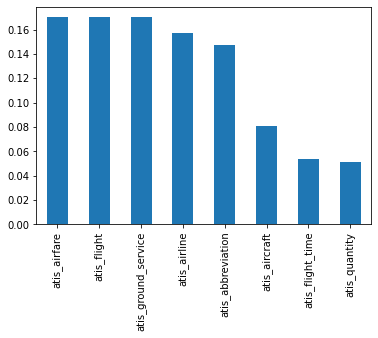

In [11]:
df = pd.DataFrame()
df['text'] = [i[0] for i in X_resampled.tolist()]
df['intent'] = y_resampled.tolist()
df['intent'].value_counts(normalize=True).plot(kind='bar')

In [12]:
df.groupby('intent')['text'].count().reset_index()

,intent,text
0,atis_abbreviation,147
1,atis_aircraft,81
2,atis_airfare,170
3,atis_airline,157
4,atis_flight,170
5,atis_flight_time,54
6,atis_ground_service,170
7,atis_quantity,51


In [13]:
df

,text,intent
0,what does mco stand for,atis_abbreviation
1,what does the abbreviation co mean,atis_abbreviation
2,what is hp,atis_abbreviation
3,is fare code b the same as business class,atis_abbreviation
4,what does ewr mean,atis_abbreviation
...,...,...
995,how many flights does continental airlines ha...,atis_quantity
996,how many first class flights does delta have ...,atis_quantity
997,how many united flights are there from san fr...,atis_quantity
998,how many fares are there one way from tacoma ...,atis_quantity


In [14]:
def get_response(data):
    if data['intent'] == 'atis_abbreviation':
        return 'Please visit atis_abbreviation.com'
    elif data['intent'] == 'atis_aircraft':
        return 'Please visit atis_aircraft.com'
    elif data['intent'] == 'atis_airfare':
        return 'Please visit atis_airfare.com'
    elif data['intent'] == 'atis_airline':
        return 'Please visit atis_airline.com'
    elif data['intent'] == 'atis_flight':
        return 'Please visit atis_flight.com'
    elif data['intent'] == 'atis_flight_time':
        return 'Please visit atis_flight_time.com'
    elif data['intent'] == 'atis_ground_service':
        return 'Please visit atis_ground_service.com'
    elif data['intent'] == 'atis_quantity':
        return 'Please visit atis_quantity.com'
    
df['response'] = df.apply(get_response, axis=1)

In [15]:
# create json file
intents = {'intents':[]}
for i,j in df.groupby(['intent','response'])['text'].apply(list).reset_index().iterrows():
    intents['intents'].append({'tag':j[0],
                              'pattern':j[2],
                              'response':j[1],
                              'context':[]})

In [21]:
# intents['intents'][5]

In [16]:
# save the json file
import codecs, json
with codecs.open('train_intent.json', 'w', 'utf8') as f:
     f.write(json.dumps(intents, ensure_ascii=False))
# intents

In [17]:
# create test intents
test_data = pd.read_csv('data/atis_intents_test.csv')
test_data.columns = ['intent','text']

In [18]:
test_data.groupby('intent')['text'].count().reset_index()

,intent,text
0,atis_abbreviation,33
1,atis_aircraft,9
2,atis_airfare,48
3,atis_airline,38
4,atis_flight,631
5,atis_flight_time,1
6,atis_ground_service,36
7,atis_quantity,3


In [20]:
test_data['response'] = test_data.apply(get_response, axis=1)

In [21]:
test_data

,intent,text,response
0,atis_airfare,on april first i need a ticket from tacoma to...,Please visit atis_airfare.com
1,atis_flight,on april first i need a flight going from pho...,Please visit atis_flight.com
2,atis_flight,i would like a flight traveling one way from ...,Please visit atis_flight.com
3,atis_flight,i would like a flight from orlando to salt la...,Please visit atis_flight.com
4,atis_flight,i need a flight from toronto to newark one wa...,Please visit atis_flight.com
...,...,...,...
794,atis_flight,please find all the flights from cincinnati t...,Please visit atis_flight.com
795,atis_flight,find me a flight from cincinnati to any airpo...,Please visit atis_flight.com
796,atis_flight,i'd like to fly from miami to chicago on amer...,Please visit atis_flight.com
797,atis_flight,i would like to book a round trip flight from...,Please visit atis_flight.com


In [22]:
# create json file for test datset
intents = {'intents':[]}
for i,j in test_data.groupby(['intent','response'])['text'].apply(list).reset_index().iterrows():
    intents['intents'].append({'tag':j[0],
                              'pattern':j[2],
                              'response':j[1],
                              'context':[]})

In [27]:
# save the intents
# save the json file
import codecs, json
with codecs.open('test_intent.json', 'w', 'utf8') as f:
     f.write(json.dumps(intents, ensure_ascii=False))
# intents